Lập trình Python cho Máy học - CS116.Q11

ĐỒ ÁN: Tiền xử lý dữ liệu

In [14]:
# Import thư viện cần thiết
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import re


CHỌN ĐƯỜNG DẪN

In [15]:
# Đường dẫn thư mục chứa các file parquet
base_path = Path(r"D:\recommendation dataset")

ĐỌC DỮ LIỆU SƯƠNG SƯƠNG

In [16]:
# Tắt cảnh báo không cần thiết
warnings.filterwarnings('ignore')

# Cài đặt style cho biểu đồ
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Tìm tất cả file parquet trong thư mục
all_parquet_files = list(base_path.glob("*.parquet"))
print(f"Tìm thấy {len(all_parquet_files)} file parquet trong thư mục.")

# Phân loại file theo tên
sales_item_files = []
sales_purchase_files = []
sales_user_files = []

for file_path in all_parquet_files:
    name = file_path.name.lower()
    
    if "sales_pers.item" in name:
        sales_item_files.append(file_path)
    elif "sales_pers.purchase" in name or "sales_pers.purchase_history_daily" in name:
        sales_purchase_files.append(file_path)
    elif "sales_pers.user" in name:
        sales_user_files.append(file_path)

# In kết quả phân loại
print(f"""
 Tổng kết:
   sales_pers.item: {len(sales_item_files)} files
   sales_pers.purchase: {len(sales_purchase_files)} files
   sales_pers.user: {len(sales_user_files)} files
""")

# Hàm đọc nhóm file parquet
def read_parquet_group(file_list, group_name):
    if not file_list:
        print(f"Không có file nào cho nhóm {group_name}")
        return None
    
    print(f"Đang đọc {len(file_list)} file(s) cho nhóm {group_name}...")
    
    df = pl.read_parquet(file_list)
    
    print(f"{group_name} loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")
    return df

# Đọc dữ liệu từ các nhóm file
sales_item_df = read_parquet_group(sales_item_files, "SALES ITEM")
sales_purchase_df = read_parquet_group(sales_purchase_files, "SALES PURCHASE")
sales_user_df = read_parquet_group(sales_user_files, "SALES USER")

# Tổng kết dữ liệu đã đọc
print("\nTỔNG KẾT DỮ LIỆU:")
if sales_item_df is not None:
    print(f"sales_item_df: {sales_item_df.shape}")
if sales_purchase_df is not None:
    print(f"sales_purchase_df: {sales_purchase_df.shape}")
if sales_user_df is not None:
    print(f"sales_user_df: {sales_user_df.shape}")

Tìm thấy 83 file parquet trong thư mục.

 Tổng kết:
   sales_pers.item: 1 files
   sales_pers.purchase: 72 files
   sales_pers.user: 10 files

Đang đọc 1 file(s) cho nhóm SALES ITEM...
SALES ITEM loaded: 27,332 rows × 34 columns
Đang đọc 72 file(s) cho nhóm SALES PURCHASE...
SALES PURCHASE loaded: 35,729,825 rows × 16 columns
Đang đọc 10 file(s) cho nhóm SALES USER...
SALES USER loaded: 4,573,964 rows × 18 columns

TỔNG KẾT DỮ LIỆU:
sales_item_df: (27332, 34)
sales_purchase_df: (35729825, 16)
sales_user_df: (4573964, 18)


In [17]:
# Tạo dictionary chứa các DataFrame
datasets = {
    "SALES ITEM": sales_item_df,
    "SALES PURCHASE": sales_purchase_df,
    "SALES USER": sales_user_df
}

In [18]:
# Thống kê tất cả các cột trong từng bảng
# Tháo docstring (""") ra để chạy thử, nhưng khá lâu!
# Khỏi chạy nếu không cần thiết!

"""
for name, df in datasets.items():
    if df is None:
        continue

    print(f"\n[ {name} ]")
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print("Columns:", df.columns)

    print("\nThống kê tất cả các cột:")
    for col in df.columns:
        try:
            # Ép kiểu về chuỗi để thống kê phổ biến
            col_str = df[col].cast(pl.Utf8).drop_nulls()
            unique_count = col_str.n_unique()
            most_common = col_str.value_counts().sort("count", descending=True).head(1)

            if most_common.shape[0] > 0:
                most_common_val = most_common[0, col]
                most_common_freq = most_common[0, "count"]
                print(f" - {col}: {unique_count} giá trị duy nhất, phổ biến nhất: '{most_common_val}' ({most_common_freq} lần)")
            else:
                print(f" - {col}: {unique_count} giá trị duy nhất, không có giá trị phổ biến")

        except Exception as e:
            print(f"Lỗi khi thống kê cột '{col}': {e}")
"""

'\nfor name, df in datasets.items():\n    if df is None:\n        continue\n\n    print(f"\n[ {name} ]")\n    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")\n    print("Columns:", df.columns)\n\n    print("\nThống kê tất cả các cột:")\n    for col in df.columns:\n        try:\n            # Ép kiểu về chuỗi để thống kê phổ biến\n            col_str = df[col].cast(pl.Utf8).drop_nulls()\n            unique_count = col_str.n_unique()\n            most_common = col_str.value_counts().sort("count", descending=True).head(1)\n\n            if most_common.shape[0] > 0:\n                most_common_val = most_common[0, col]\n                most_common_freq = most_common[0, "count"]\n                print(f" - {col}: {unique_count} giá trị duy nhất, phổ biến nhất: \'{most_common_val}\' ({most_common_freq} lần)")\n            else:\n                print(f" - {col}: {unique_count} giá trị duy nhất, không có giá trị phổ biến")\n\n        except Exception as e:\n            print(f"

TASK 1: Loại bỏ các cột không cần thiết. 

In [19]:
# Danh sách các cột cần loại bỏ
cols_to_drop = [
    # SALES ITEM
    "is_deleted",
    "last_sync_date",
    "sync_error_message",
    "image_url",
    "description_new",
    "weight",
    "sync_status_id",
    "p_id",
    "item_id",
    "category_l1_id",
    "category_l2_id",
    "category_l3_id",
    "category_id",
    "description",
    "manufacturer",

    # SALES PURCHASE
    "is_deleted",
    "event_type",
    "user_id",
    "item_id",
    "customer_id",

    # SALES USER
    "is_deleted",
    "sync_status_id",
    "last_sync_date",
    "sync_error_message",
    "customer_id",
    "user_id"
]

# Lặp qua từng DataFrame trong datasets
for name, df in datasets.items():
    if df is None:
        continue

    print(f"\n[ {name} ]")
    existing_cols = [c for c in cols_to_drop if c in df.columns]

    if existing_cols:
        print(f" - Các cột sẽ bị loại bỏ: {existing_cols}")
        df = df.drop(existing_cols)
        datasets[name] = df  # Cập nhật lại DataFrame sau khi loại bỏ
    else:
        print(" - Không có cột nào trong danh sách cần loại bỏ.")

    print(f" - Kích thước mới: {df.shape[0]:,} rows × {df.shape[1]} columns")



[ SALES ITEM ]
 - Các cột sẽ bị loại bỏ: ['is_deleted', 'last_sync_date', 'sync_error_message', 'image_url', 'description_new', 'weight', 'sync_status_id', 'p_id', 'item_id', 'category_l1_id', 'category_l2_id', 'category_l3_id', 'category_id', 'description', 'manufacturer', 'is_deleted', 'item_id', 'is_deleted', 'sync_status_id', 'last_sync_date', 'sync_error_message']
 - Kích thước mới: 27,332 rows × 19 columns

[ SALES PURCHASE ]
 - Các cột sẽ bị loại bỏ: ['is_deleted', 'item_id', 'is_deleted', 'event_type', 'user_id', 'item_id', 'customer_id', 'is_deleted', 'customer_id', 'user_id']
 - Kích thước mới: 35,729,825 rows × 11 columns

[ SALES USER ]
 - Các cột sẽ bị loại bỏ: ['is_deleted', 'last_sync_date', 'sync_error_message', 'sync_status_id', 'is_deleted', 'user_id', 'customer_id', 'is_deleted', 'sync_status_id', 'last_sync_date', 'sync_error_message', 'customer_id', 'user_id']
 - Kích thước mới: 4,573,964 rows × 12 columns


TASK 2.1: Xử lý NULL

In [20]:
# Trong lúc xóa các cột thì các giá trị null đã bị loại bỏ rồi!

TASK 2.2: Xử lý Outlier

TASK 3:

In [21]:
for name, df in datasets.items():
    if df is None:
        continue
    num_cols = [col for col, dtype in zip(df.columns, df.dtypes) if dtype in pl.NUMERIC_DTYPES]
    if len(num_cols) < 2:
        print(f"[{name}] Không đủ cột số để tính tương quan.")
        continue

    # Lấy mẫu nhỏ
    max_sample = 15000000
    df_sample = df.select(num_cols)
    if df_sample.height > max_sample:
        df_sample = df_sample.sample(n=max_sample, seed=42)
    # Tính corr matrix và chuyển sang pandas df
    corr_matrix = df_sample.to_pandas().corr().abs()

    # Lấy các cặp có tương quan cao > 0.85
    mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    high_corr_pairs = (
        corr_matrix.where(mask)
        .stack()
        .reset_index()
        .rename(columns={0: "correlation", "level_0": "feature_1", "level_1": "feature_2"})
        .query("correlation > 0.85")
    )

    print(f"\n[ {name} ] Các cặp biến có tương quan cao (> 0.85):")
    if not high_corr_pairs.empty:
        print(high_corr_pairs, "\n")
    else:
        print("Không có cặp nào quá tương đồng.\n")


[ SALES ITEM ] Các cặp biến có tương quan cao (> 0.85):
  feature_1 feature_2  correlation
1     price        gp     0.886709 


[ SALES PURCHASE ] Các cặp biến có tương quan cao (> 0.85):
     feature_1 feature_2  correlation
2    timestamp  date_key     0.998297
8  event_value  quantity     1.000000 


[ SALES USER ] Các cặp biến có tương quan cao (> 0.85):
Không có cặp nào quá tương đồng.



In [25]:
reduced_datasets = {}

for name, df in datasets.items():
    if df is None:
        continue

    num_cols = [col for col, dtype in zip(df.columns, df.dtypes) if dtype in pl.NUMERIC_DTYPES]
    if len(num_cols) < 2:
        continue

    # Lấy mẫu
    max_sample = 15000000
    df_sample = df.select(num_cols)
    if df_sample.height > max_sample:
        df_sample = df_sample.sample(n=max_sample, seed=42)

    corr_matrix = df_sample.to_pandas().corr().abs()
    mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    high_corr_pairs = (
        corr_matrix.where(mask)
        .stack()
        .reset_index()
        .rename(columns={0: "correlation", "level_0": "feature_1", "level_1": "feature_2"})
        .query("correlation > 0.85")
    )

    # Nếu có cặp tương quan cao, bỏ cột
    if not high_corr_pairs.empty:
        to_drop = set()
        for _, row in high_corr_pairs.iterrows():
            f1, f2 = row["feature_1"], row["feature_2"]
            if f2 not in to_drop:
                to_drop.add(f2)

        print(f"\n[ {name} ] Số cột loại bỏ: {len(to_drop)}")
        print("Các cột bị loại:", list(to_drop), "\n")

        # Tạo dataset mới sau khi bỏ features
        """
        reduced_datasets[name] = df.drop(list(to_drop))
    else:
        print(f"\n[ {name} ] Không có feature nào cần loại bỏ.\n")
        reduced_datasets[name] = df
        """

        # Ghi đè lại datasets[name]
        datasets[name] = df.drop(list(to_drop))
    else:
        print(f"\n[ {name} ] Không có feature nào cần loại bỏ.\n")




[ SALES ITEM ] Số cột loại bỏ: 1
Các cột bị loại: ['gp'] 


[ SALES PURCHASE ] Số cột loại bỏ: 2
Các cột bị loại: ['quantity', 'date_key'] 


[ SALES USER ] Không có feature nào cần loại bỏ.




[ SALES ITEM ] - Biểu đồ tương quan trước và sau khi loại bỏ:


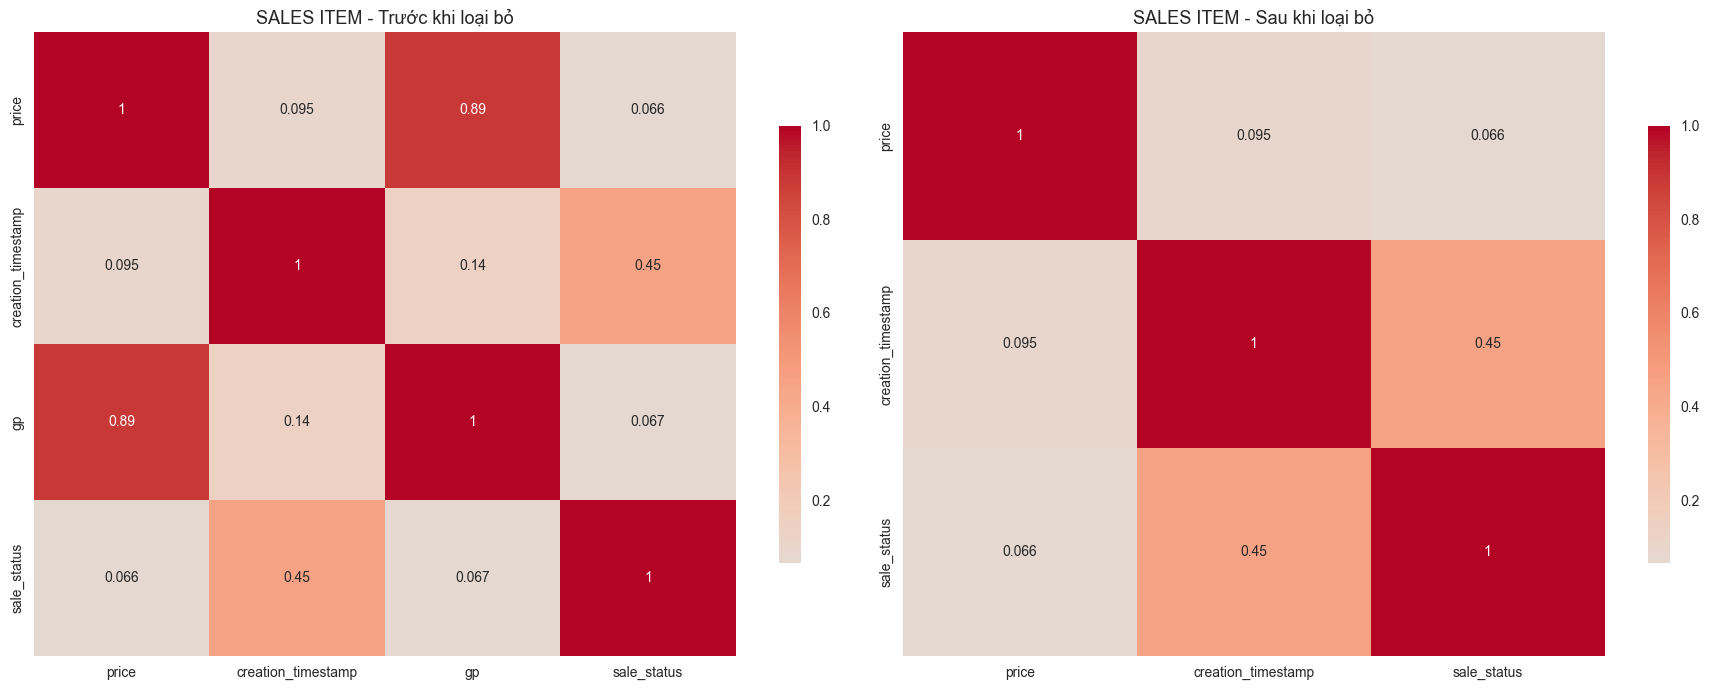


[ SALES PURCHASE ] - Biểu đồ tương quan trước và sau khi loại bỏ:


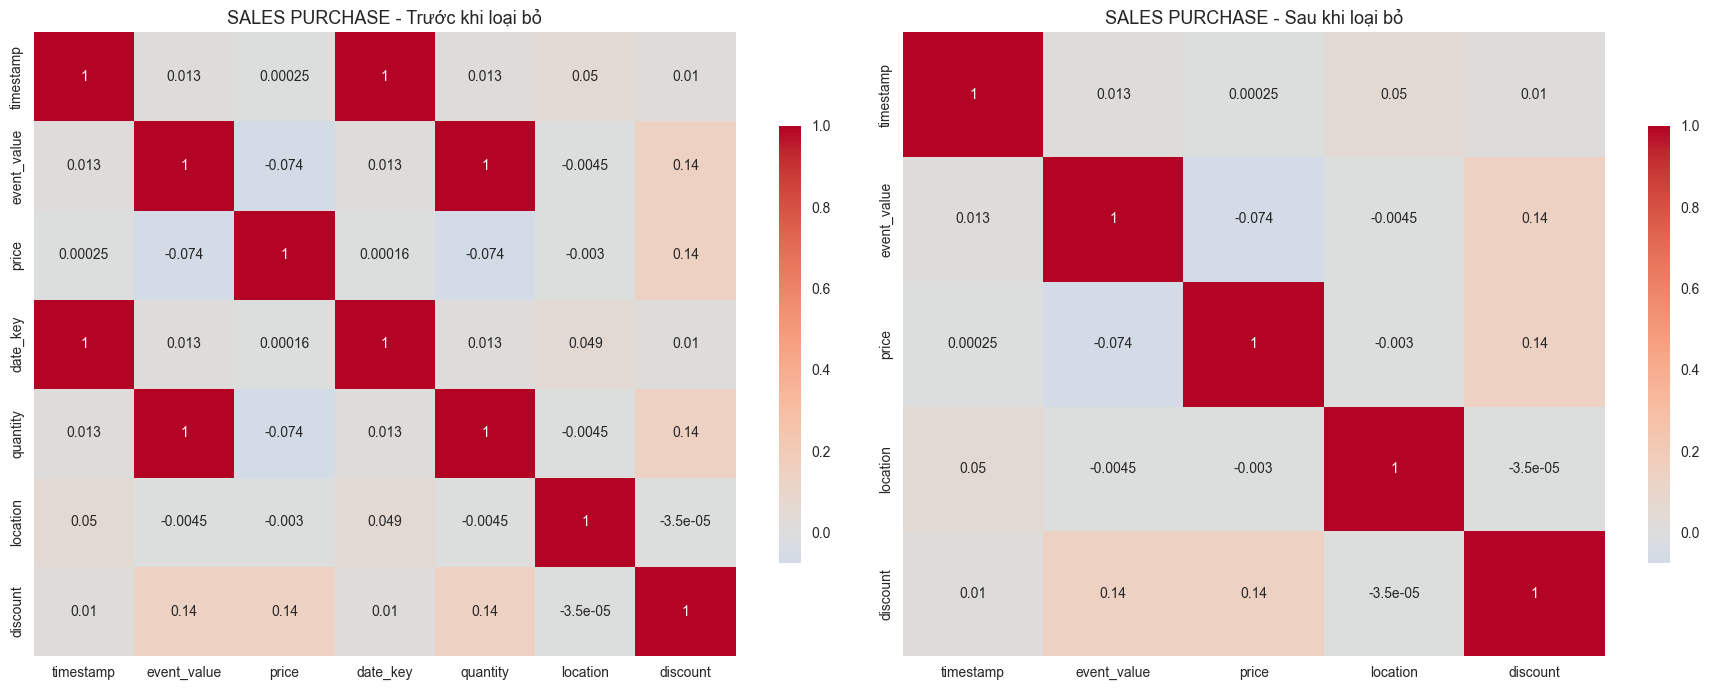


[ SALES USER ] - Biểu đồ tương quan trước và sau khi loại bỏ:


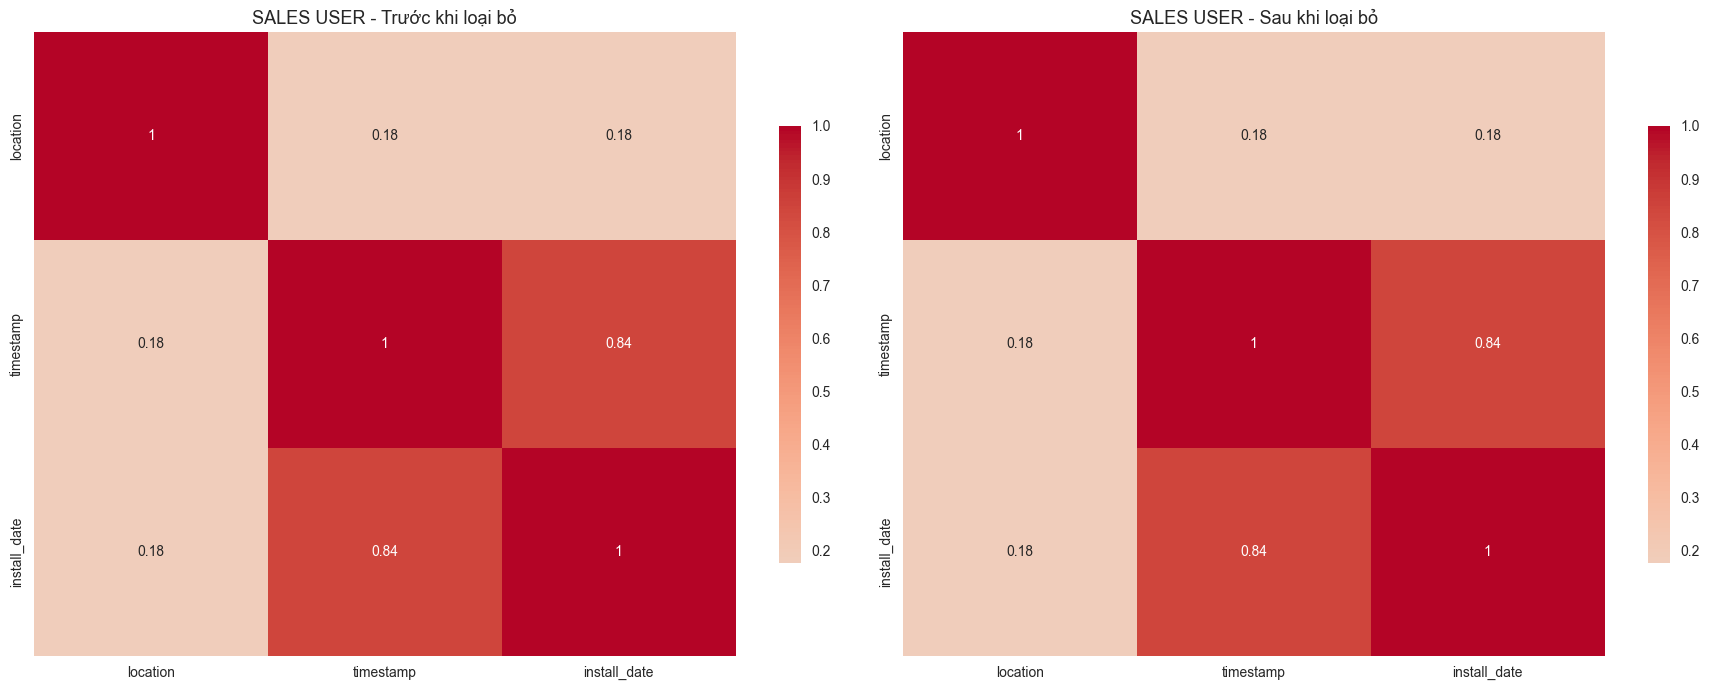

In [23]:
# Visualize
for name in reduced_datasets:
    print(f"\n[ {name} ] - Biểu đồ tương quan trước và sau khi loại bỏ:")

    num_cols_before = [col for col, dtype in zip(datasets[name].columns, datasets[name].dtypes) if dtype in pl.NUMERIC_DTYPES]
    num_cols_after = [col for col, dtype in zip(reduced_datasets[name].columns, reduced_datasets[name].dtypes) if dtype in pl.NUMERIC_DTYPES]

    df_before = datasets[name].select(num_cols_before)
    df_after = reduced_datasets[name].select(num_cols_after)

    max_sample = 50000
    if df_before.height > max_sample:
        df_before = df_before.sample(n=max_sample, seed=42)
    if df_after.height > max_sample:
        df_after = df_after.sample(n=max_sample, seed=42)

    corr_before = df_before.to_pandas().corr()
    corr_after = df_after.to_pandas().corr()

    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    sns.heatmap(corr_before, annot=True, cmap="coolwarm", ax=axes[0], center=0, cbar_kws={'shrink': 0.7})
    axes[0].set_title(f"{name} - Trước khi loại bỏ", fontsize=13)

    sns.heatmap(corr_after, annot=True, cmap="coolwarm", ax=axes[1], center=0, cbar_kws={'shrink': 0.7})
    axes[1].set_title(f"{name} - Sau khi loại bỏ", fontsize=13)

    plt.tight_layout()
    plt.show()


TASK 4:

TASK 5:

[TEST] - IN RA DỮ LIỆU ĐỂ ĐỌC

In [26]:
# Thống kê tất cả các cột trong từng bảng ()
# Tháo docstring (""") ra để chạy thử, nhưng khá lâu!
# Khỏi chạy nếu không cần thiết!

for name, df in datasets.items():
    if df is None:
        continue

    print(f"\n[ {name} ]")
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print("Columns:", df.columns)

    print("\nThống kê tất cả các cột:")
    for col in df.columns:
        try:
            # Ép kiểu về chuỗi để thống kê phổ biến
            col_str = df[col].cast(pl.Utf8).drop_nulls()
            unique_count = col_str.n_unique()
            most_common = col_str.value_counts().sort("count", descending=True).head(1)

            if most_common.shape[0] > 0:
                most_common_val = most_common[0, col]
                most_common_freq = most_common[0, "count"]
                print(f" - {col}: {unique_count} giá trị duy nhất, phổ biến nhất: '{most_common_val}' ({most_common_freq} lần)")
            else:
                print(f" - {col}: {unique_count} giá trị duy nhất, không có giá trị phổ biến")

        except Exception as e:
            print(f"Lỗi khi thống kê cột '{col}': {e}")


[ SALES ITEM ]
Shape: 27,332 rows × 18 columns
Columns: ['price', 'category_l1', 'category_l2', 'category_l3', 'category', 'brand', 'creation_timestamp', 'created_date', 'updated_date', 'gender_target', 'age_group', 'item_type', 'color', 'size', 'origin', 'volume', 'material', 'sale_status']

Thống kê tất cả các cột:
 - price: 733 giá trị duy nhất, phổ biến nhất: '49000.0000' (3715 lần)
 - category_l1: 15 giá trị duy nhất, phổ biến nhất: 'Thời trang' (15042 lần)
 - category_l2: 134 giá trị duy nhất, phổ biến nhất: 'Cơ cấu hàng cũ' (9105 lần)
 - category_l3: 470 giá trị duy nhất, phổ biến nhất: 'Thời trang bé trai, bé gái cũ' (5164 lần)
 - category: 1651 giá trị duy nhất, phổ biến nhất: 'Bộ bé trai Animo' (1018 lần)
 - brand: 976 giá trị duy nhất, phổ biến nhất: 'Animo' (8149 lần)
 - creation_timestamp: 10836 giá trị duy nhất, phổ biến nhất: '1715773357' (273 lần)
 - created_date: 12108 giá trị duy nhất, phổ biến nhất: '2024-05-15 11:42:37.247000' (273 lần)
 - updated_date: 286 giá trị